# Heart Disease Prediction

## 1. Description

Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

## 2. Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from feature_engine.outliers import Winsorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from tabulate import tabulate
import pickle

### Import Datasets

In [2]:
df = pd.read_csv("Heart1.csv")

In [3]:
df.info(memory_usage='missing')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are 303 rows and 14 columns. All columns are numerical (13 int64, 1 float64). This file is 33.3 KB. 

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


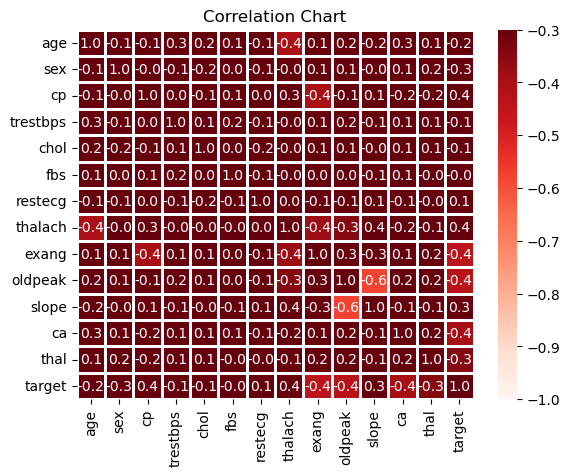

In [5]:
# Correlation on a Heatmap
def find_correlations(frame):
    frame = frame.corr()
    vmin = -1.0
    vmax = -0.3
    cmap = "Reds"
    annot=True
    fmt=".1f"
    g = sns.heatmap(
        frame,
        vmin=vmin,
        vmax=vmax,
        cmap=cmap,
        annot=annot,
        fmt=fmt,
        linewidths=1)
    g.set_title("Correlation Chart")
    
find_correlations(df)   

Target is positively correlated with chest pain type (0.4) and maximum heart rate achieved (0.4). There is also a positve correlation between the slope of peak exercise ST segment and maximum heart rate achieved (0.4). The slope of peak exercise ST segment and ST depression induced by exercise relative to rest (-0.6) have a negative correlation. 

In [6]:
# Missing Value Treatment
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in the dataset. 

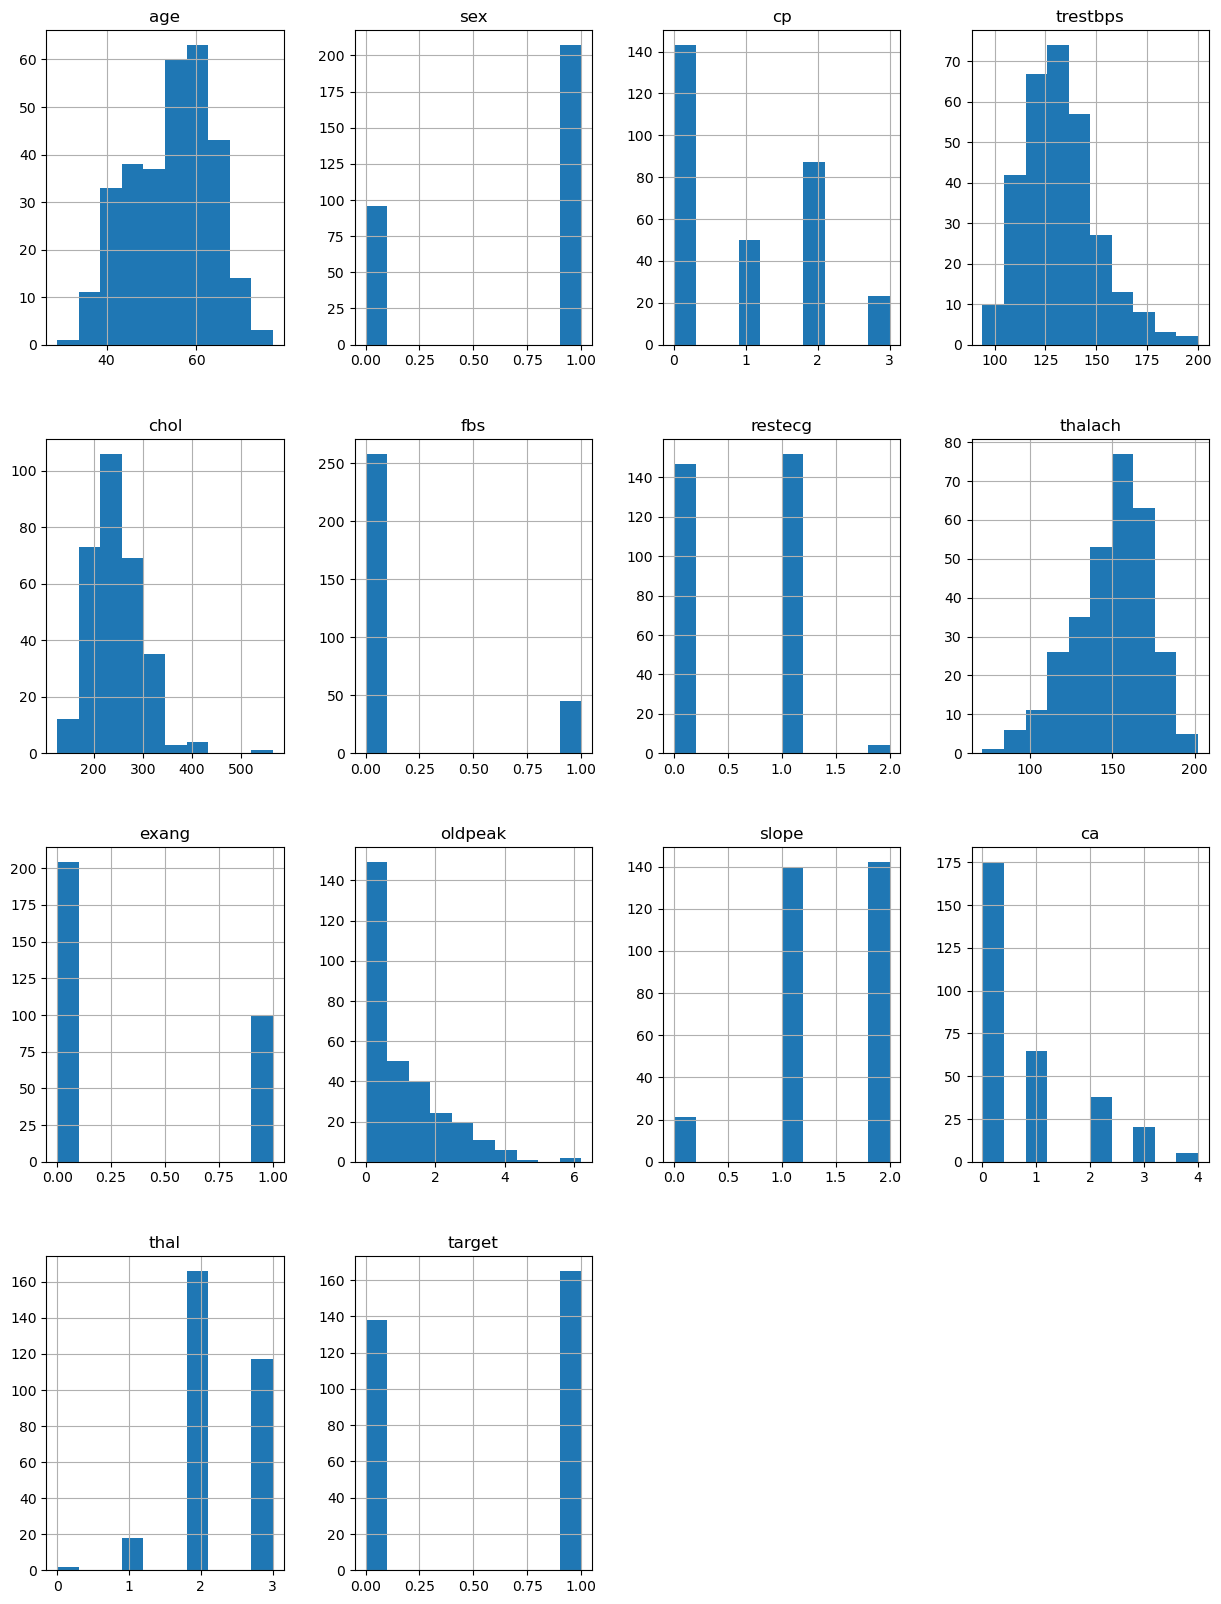

In [7]:
df.hist(figsize=(15,20))
plt.show()

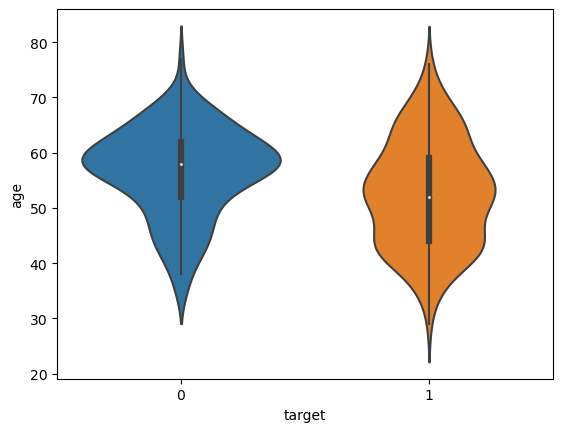

In [38]:
# Occurrence of CVD across the Age Category
sns.violinplot(df,x='target',y='age')
plt.show()

For the group with no cardiovascular disease (target=0), the median age was 58 years old and was also the most frequent age in this group. For the group with cardiovasular disease (target=1), the median was 52 years old as the group was more distributed as the most frequent age was at 53 years old.

In [9]:
# Composition of all patients with respect to the Sex category
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


Regarding gender, 93 males and 72 females in this dataset has a cardiovascular disease. 114 males and 24 females do not have a cardiovascular disease.

            chol    target
chol    1.000000 -0.085239
target -0.085239  1.000000


<AxesSubplot: xlabel='target', ylabel='chol'>

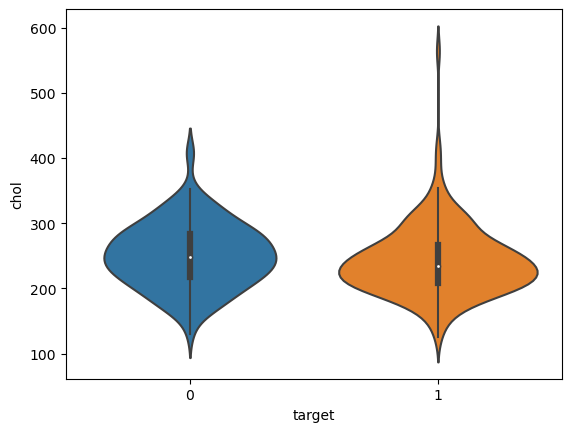

In [39]:
# Relationship between cholesterol levels and a target variable
chol_t = df[['chol','target']]
print(chol_t.corr())
sns.violinplot(df,x='target',y='chol')

<Figure size 10000x7000 with 0 Axes>

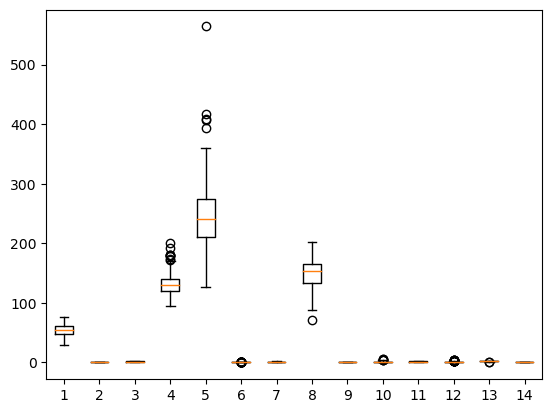

<Figure size 10000x7000 with 0 Axes>

In [11]:
plt.boxplot(df)
plt.figure(figsize =(100, 70))

<AxesSubplot: xlabel='target', ylabel='count'>

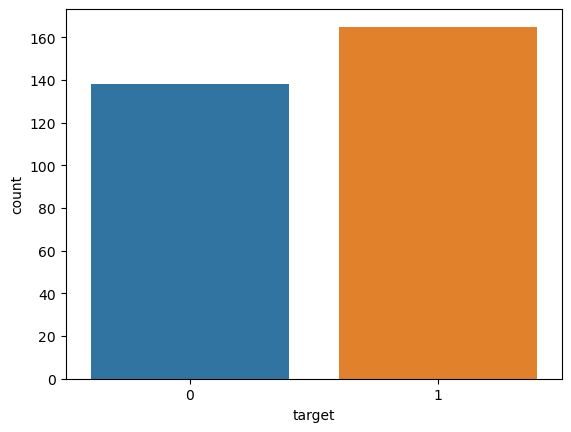

In [12]:
sns.countplot(data=df,x='target')

The dependent variable (target) seems to be balanced (0=140;1=160)

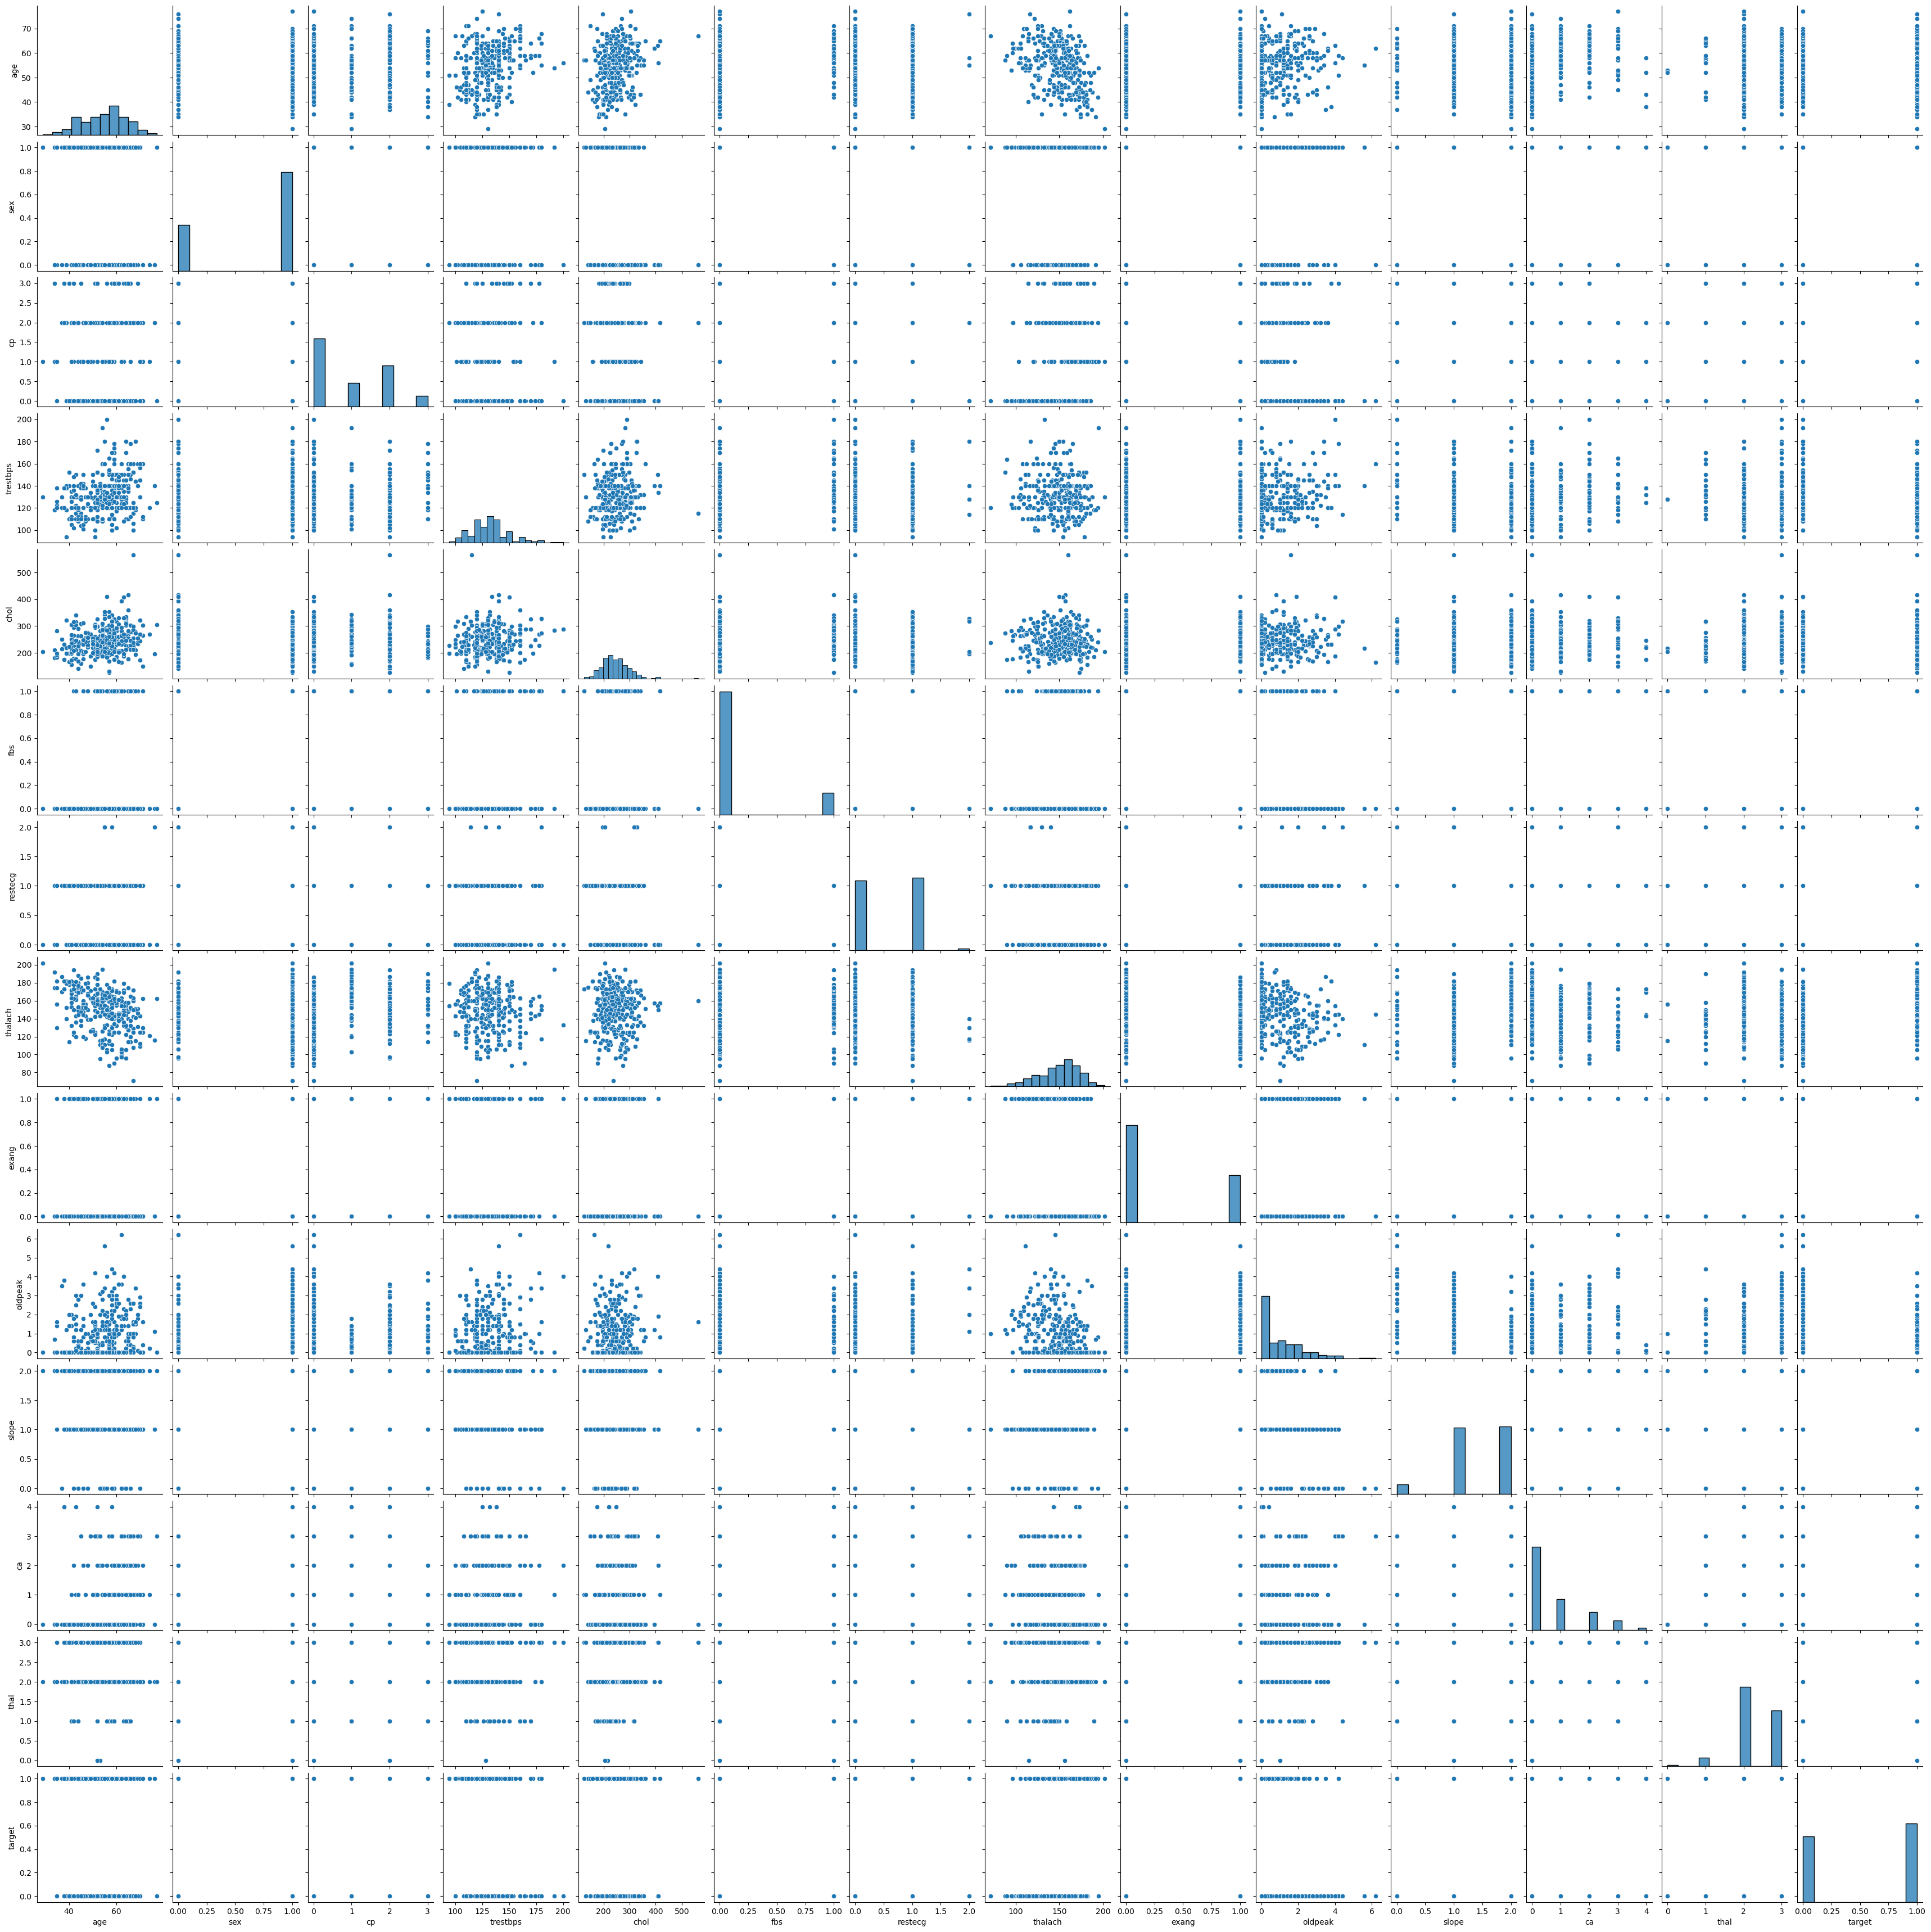

In [13]:
# Pairplot 
sns.pairplot(df)

## 3. Feature Selection

In [14]:
# Seperate Dependent Variable from Independent Variables
y = df["target"]
X = df.drop(columns=["target"])

In [15]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [16]:
# Export columns used for predictions on new data
with open ('pred_columns.pkl', 'wb') as name:
    pickle.dump(X_train.columns.tolist(), name)

In [17]:
lr = LogisticRegression(max_iter=1000)

In [18]:
# Accuracy Score on Train Dataset
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Accuracy Score on Test Dataset
y_pred = lr.predict(X_test)

In [20]:
# Random forest model
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [21]:
predictions = rfc.predict(X_test)

In [23]:
# Scores for Logistic Regression
lr_ac = accuracy_score(y_test,y_pred)
lr_pre = precision_score(y_test,y_pred)
lr_rec = recall_score(y_test,y_pred)
lr_f = f1_score(y_test,y_pred)
lr_train_roc = roc_auc_score(y_train, lr.predict(X_train))
lr_test_roc = roc_auc_score(y_test, y_pred)

# Scores for Random Forest
rf_ac = accuracy_score(y_test,predictions)
rf_pre = precision_score(y_test,predictions)
rf_rec = recall_score(y_test,predictions)
rf_f = f1_score(y_test,predictions)
rf_train_roc = roc_auc_score(y_train, rfc.predict(X_train))
rf_test_roc = roc_auc_score(y_test, predictions)

In [24]:
#Performing evaluation matrix comparison
m_tab = pd.DataFrame(columns = ["Comparison Matrix", "Logistic Regression Model", "Random Forest Model"])
m_tab["Comparison Matrix"] = ["Accuracy Score", "Precision Score","Recall Score", "F1 Score","Train ROC","Test ROC"]
m_tab["Logistic Regression Model"] = [lr_ac, lr_pre, lr_rec, lr_f, lr_train_roc, lr_test_roc]
m_tab["Random Forest Model"] = [rf_ac, rf_pre, rf_rec, rf_f, rf_train_roc, rf_test_roc]

print(tabulate(m_tab, headers = 'keys', tablefmt = 'psql', numalign="left"))

+----+---------------------+-----------------------------+-----------------------+
|    | Comparison Matrix   | Logistic Regression Model   | Random Forest Model   |
|----+---------------------+-----------------------------+-----------------------|
| 0  | Accuracy Score      | 0.813187                    | 0.813187              |
| 1  | Precision Score     | 0.823529                    | 0.823529              |
| 2  | Recall Score        | 0.84                        | 0.84                  |
| 3  | F1 Score            | 0.831683                    | 0.831683              |
| 4  | Train ROC           | 0.873241                    | 1                     |
| 5  | Test ROC            | 0.810244                    | 0.810244              |
+----+---------------------+-----------------------------+-----------------------+


## Hyperparamater Tuning

In [26]:
# RandomizedSearchCV
distributions = {"n_estimators": randint(1, 100),
                 "max_depth": randint(3,10)}
RFC = RandomForestClassifier()
RFC_clf_rs = RandomizedSearchCV(RFC, distributions, n_iter=20, verbose=False)
RFC_clf_rs.fit(X_train, y_train)
print(RFC_clf_rs.best_params_)
print(RFC_clf_rs.best_score_)

{'max_depth': 6, 'n_estimators': 60}
0.8395348837209301


In [27]:
# Train final model
RFC_final = RandomForestClassifier(n_estimators= RFC_clf_rs.best_params_["n_estimators"], 
                               max_depth= RFC_clf_rs.best_params_["max_depth"])

In [28]:
RFC_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=60)

In [29]:
predictions1 = RFC_final.predict(X_test)

In [30]:
rf_ac1 = accuracy_score(y_test,predictions1)
rf_pre1 = precision_score(y_test,predictions1)
rf_rec1 = recall_score(y_test,predictions1)
rf_f1 = f1_score(y_test,predictions1)
rf_train_roc1 = roc_auc_score(y_train, RFC_final.predict(X_train))
rf_test_roc1 = roc_auc_score(y_test, predictions1)

In [31]:
#Performing evaluation matrix comparison
m_tab = pd.DataFrame(columns = ["Comparison Matrix", "Logistic Regression Model", "Random Forest Model"])
m_tab["Comparison Matrix"] = ["Accuracy Score", "Precision Score","Recall Score", "F1 Score","Train ROC","Test ROC"]
m_tab["Logistic Regression Model"] = [lr_ac, lr_pre, lr_rec, lr_f, lr_train_roc, lr_test_roc]
m_tab["Random Forest Model"] = [rf_ac1, rf_pre1, rf_rec1, rf_f1, rf_train_roc1, rf_test_roc1]

print(tabulate(m_tab, headers = 'keys', tablefmt = 'psql', numalign="left"))

+----+---------------------+-----------------------------+-----------------------+
|    | Comparison Matrix   | Logistic Regression Model   | Random Forest Model   |
|----+---------------------+-----------------------------+-----------------------|
| 0  | Accuracy Score      | 0.813187                    | 0.824176              |
| 1  | Precision Score     | 0.823529                    | 0.826923              |
| 2  | Recall Score        | 0.84                        | 0.86                  |
| 3  | F1 Score            | 0.831683                    | 0.843137              |
| 4  | Train ROC           | 0.873241                    | 0.979381              |
| 5  | Test ROC            | 0.810244                    | 0.820244              |
+----+---------------------+-----------------------------+-----------------------+


In [32]:
RFC_final.fit(X_train, y_train)
with open ('RFC_final.pkl', 'wb') as name:
    pickle.dump(RFC_final, name)